# Energy Consumption Analysis & Prediction
### Mini Project — Data Analytics Using Python


### Annu - 240385

## Objective
The objective of this mini project is to analyze the factors influencing energy consumption and develop a predictive model that estimates energy usage using building parameters and environmental conditions. Through this project, concepts of data preprocessing, exploratory data analysis (EDA), statistical inference, and regression modeling are applied on a real-world dataset.

## Step 1: Problem Definition & Dataset Selection

### 1. Problem Definition
Energy consumption forecasting is essential for energy management, demand planning, and optimizing building performance. Predicting consumption using variables such as temperature, occupancy, lighting, and renewable energy can help in reducing wastage and improving efficiency.

### 2. Dataset Source
Link : [ https://www.kaggle.com/datasets/ajinilpatel/energy-consumption-prediction ]

The dataset used in this project, titled **“Energy Consumption Prediction”**, is sourced from **Kaggle**, a publicly available platform that provides high-quality datasets for data science and machine learning applications. The dataset contains **5000 records** and **12 attributes** related to hourly energy usage, environmental conditions, and building characteristics.

### 3. Dataset Overview
| Feature           | Description               |
| ----------------- | ------------------------- |
| Month             | Month number (1–12)       |
| Hour              | Hour of the day (0–23)    |
| DayOfWeek         | Categorical day name      |
| Holiday           | Yes/No                    |
| Temperature       | Measured in °C            |
| Humidity          | Percentage                |
| SquareFootage     | Building size             |
| Occupancy         | Number of people          |
| HVACUsage         | On/Off                    |
| LightingUsage     | On/Off                    |
| RenewableEnergy   | Produced renewable energy |
| EnergyConsumption | **Target variable**       |


### 4. Data Types
**Numerical**: Month, Hour, Temperature, Humidity, SquareFootage, Occupancy, RenewableEnergy, EnergyConsumption

**Categorical**: DayOfWeek, Holiday, HVACUsage, LightingUsage

### Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

from scipy import stats

### Load Dataset

In [25]:
df = pd.read_csv("Energy_consumption_dataset.csv")
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


### Basic Information

In [28]:
df.shape

(5000, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,5000.0,6.251200,3.588687,1.000000,3.000000,6.000000,9.000000,12.000000
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


## Step 2: Data Cleaning & Preparation

### 1. Check for Missing Values + Handle Them (Imputation)

In [37]:
# Check missing values
df.isnull().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

In [58]:
# Filling missing values for numerical columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Display missing values after filling
print(df[numeric_cols].isnull().sum())

Month                0
Hour                 0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


In [60]:
# Check missing values BEFORE filling
print("Missing values BEFORE filling:")
print(df[categorical_cols].isnull().sum())

Missing values BEFORE filling:
DayOfWeek        0
Holiday          0
HVACUsage        0
LightingUsage    0
dtype: int64


In [62]:
# Filling missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [64]:
# Check missing values AFTER filling
print("\nMissing values AFTER filling:")
print(df[categorical_cols].isnull().sum())


Missing values AFTER filling:
DayOfWeek        0
Holiday          0
HVACUsage        0
LightingUsage    0
dtype: int64


### 2. Remove Duplicates & Irrelevant Columns

In [49]:
# Count duplicates
df.duplicated().sum()

0

In [66]:
# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

### 3. Handle Outliers (IQR method)

In [56]:
# Outlier handling using IQR
print("Outlier counts before fixing:\n")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"{col}: below={ (df[col] < lower).sum() }, above={ (df[col] > upper).sum() }")

print("\nFixing outliers...\n")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

print("Outlier handling complete.")
df.describe()

Outlier counts before fixing:

Month: below=0, above=0
Hour: below=0, above=0
Temperature: below=0, above=0
Humidity: below=0, above=0
SquareFootage: below=0, above=0
Occupancy: below=0, above=0
RenewableEnergy: below=0, above=0
EnergyConsumption: below=0, above=0

Fixing outliers...

Outlier handling complete.


,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


### 4. Normalize / Scale Data

In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


### 5. Brief Justification
#### Justification for Preprocessing Steps

1. **Missing values** were treated using median (numerical) and mode (categorical) to prevent loss of data.  
2. **Duplicates** were removed to ensure data quality and avoid biased analysis.  
3. **Outliers** were capped using the IQR method to prevent extreme values from affecting model performance.  
4. **Scaling** was applied to numerical features with large ranges to improve model accuracy and training stability.  

## STEP 3: Exploratory Data Analysis (EDA)

### PART 1 — Univariate Analysis (Histogram, Boxplot, Distribution)

#### **Graph 1: Distribution of Energy Consumption**
**Question:**  
What is the overall distribution of energy consumption values in the dataset, and does the data show skewness or concentration in any specific range?

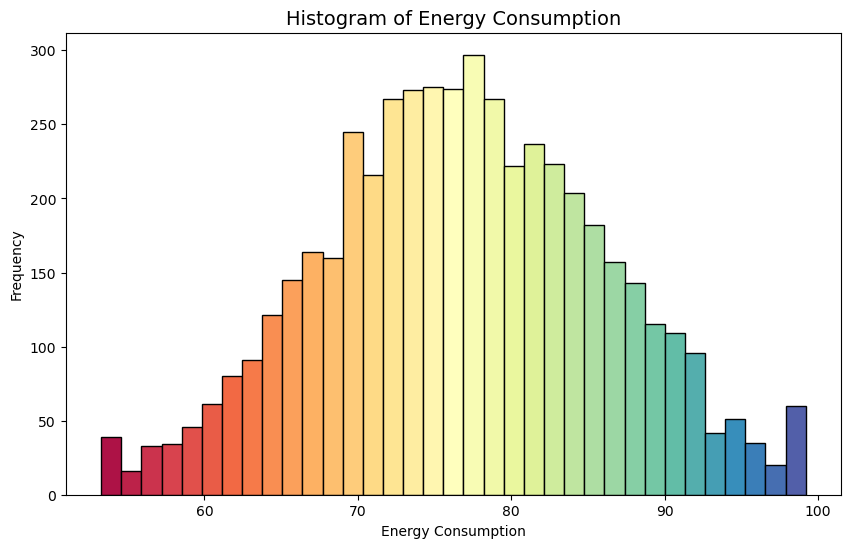

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Create histogram manually using matplotlib
counts, bins, patches = plt.hist(df['EnergyConsumption'], bins=35, edgecolor='black')

# Generate many colors
colors = sns.color_palette("Spectral", len(patches))

# Assign different color to each bin
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.title("Histogram of Energy Consumption", fontsize=14)
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()

#### **Graph 2: Energy Consumption by Hour of the Day**  
**Question:** How does energy consumption vary across different hours?

C:\Users\rajesh\AppData\Local\Temp\ipykernel_14752\29665707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


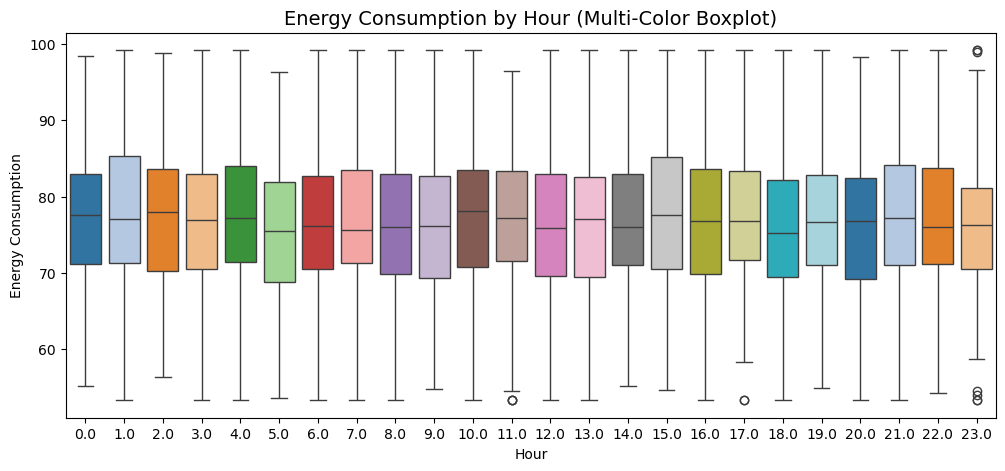

In [98]:
plt.figure(figsize=(12,5))
palette = sns.color_palette("tab20", len(df["Hour"].unique()))
sns.boxplot(
    x="Hour",
    y="EnergyConsumption",
    data=df,
    palette=palette
)
plt.title("Energy Consumption by Hour (Boxplot)", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Energy Consumption")
plt.show()

### **Graph 3: Correlation Heatmap**  
**Question:** Which numerical features are correlated with energy consumption?

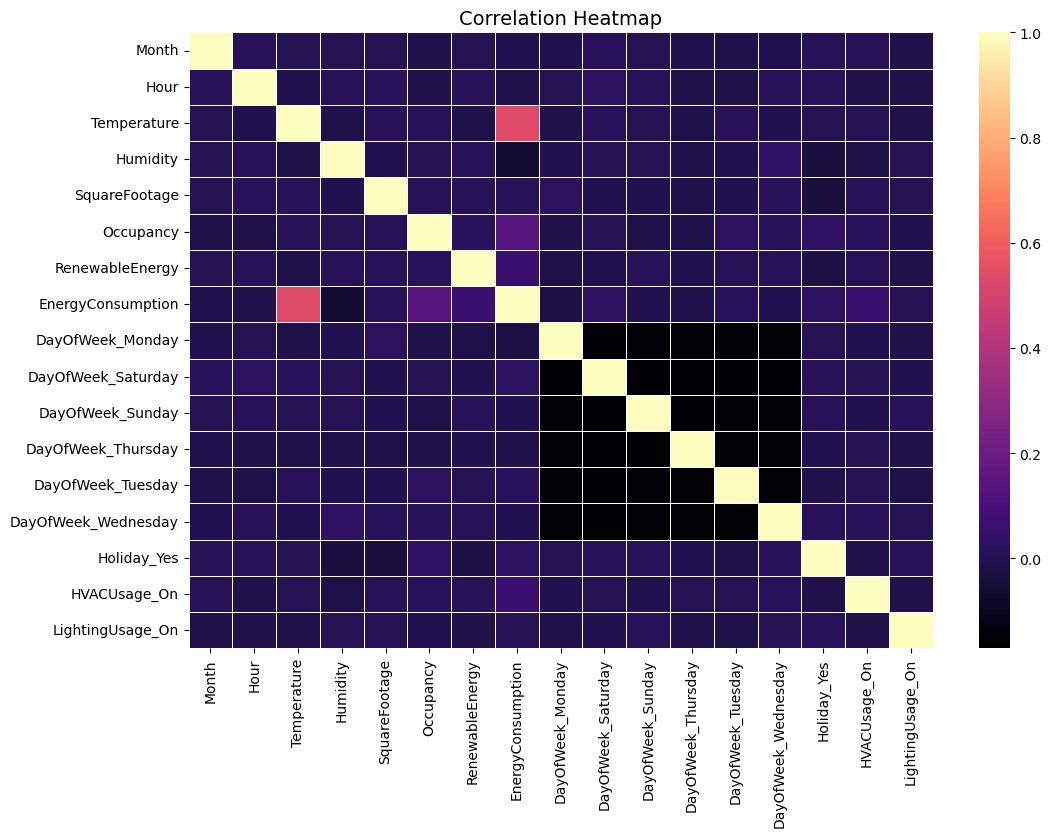

In [101]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="magma", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### **Graph 4:Energy Consumption by hour**
**Question:** Does temperature affect energy usage?

In [133]:
df_original = pd.read_csv("Energy_consumption_dataset.csv")

# Extract DayOfWeek column
df['DayOfWeek_new'] = df_original['DayOfWeek']

In [135]:
print(df.columns)

Index(['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity',
       'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage',
       'RenewableEnergy', 'EnergyConsumption', 'DayOfWeek_new'],
      dtype='object')


In [137]:
# verify columns
print("Columns:", df.columns.tolist())
# check for DayOfWeek specifically
print("'DayOfWeek' in df.columns ->", 'DayOfWeek' in df.columns)


Columns: ['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'EnergyConsumption', 'DayOfWeek_new']
'DayOfWeek' in df.columns -> True


In [139]:
# verify columns
print("Columns:", df.columns.tolist())
# check for DayOfWeek specifically
print("'DayOfWeek' in df.columns ->", 'DayOfWeek' in df.columns)

Columns: ['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'EnergyConsumption', 'DayOfWeek_new']
'DayOfWeek' in df.columns -> True


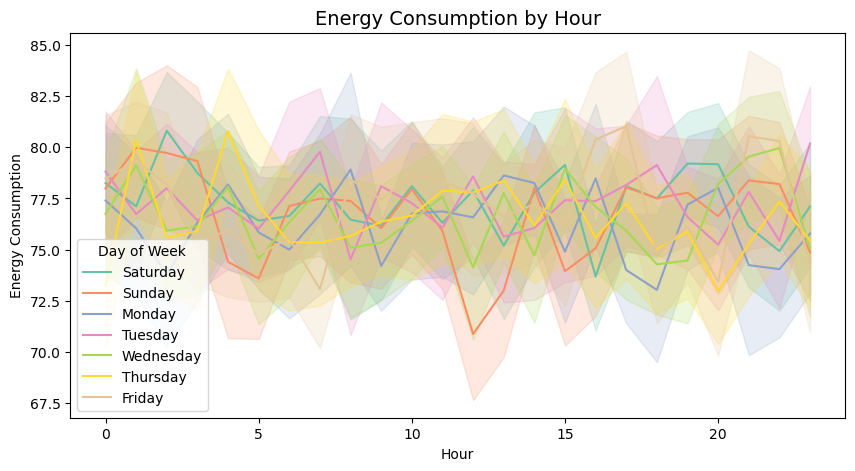

In [147]:
plt.figure(figsize=(10,5))

sns.lineplot(
    x="Hour",
    y="EnergyConsumption",
    data=df,
    hue="DayOfWeek",
    palette="Set2"
)

plt.title("Energy Consumption by Hour", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Energy Consumption")
plt.legend(title="Day of Week")
plt.show()

### **Graph 5: Temperature vs Energy Consumption** 
**Question:** How does temperature influence energy consumption?

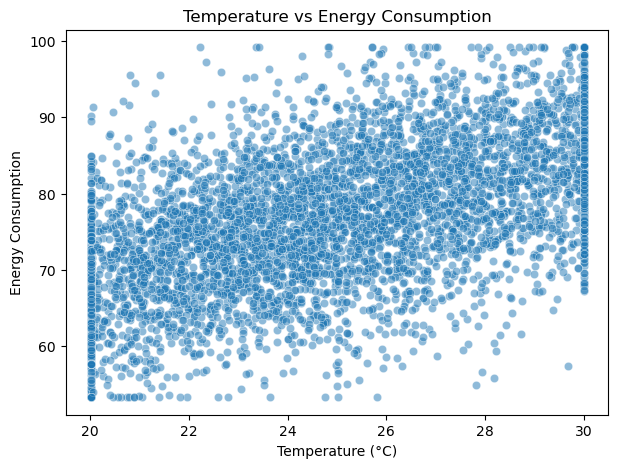

In [159]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Temperature'], y=df['EnergyConsumption'], alpha=0.5)
plt.title("Temperature vs Energy Consumption")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption")
plt.show()

### **Graph 6: Average Energy Consumption by Day of Week**  
**Question:** Which day has the highest and lowest average consumption?

C:\Users\rajesh\AppData\Local\Temp\ipykernel_14752\1871205885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DayOfWeek", y="EnergyConsumption", data=df, order=order, palette="viridis")


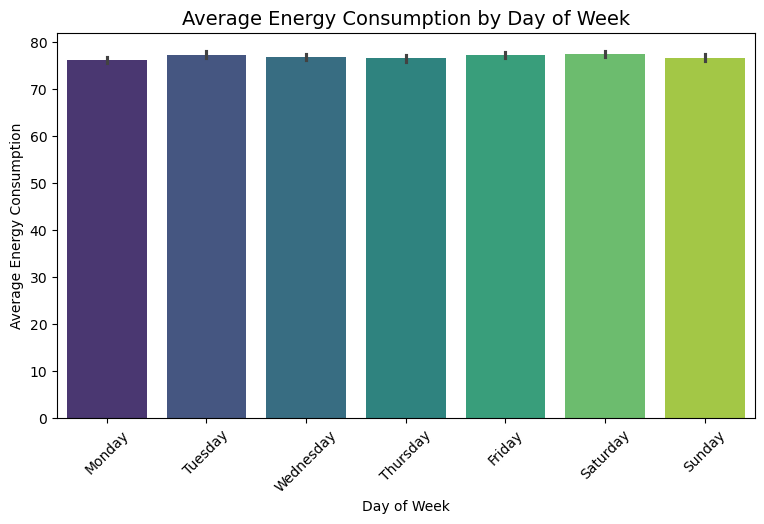

In [145]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(9,5))
sns.barplot(x="DayOfWeek", y="EnergyConsumption", data=df, order=order, palette="viridis")
plt.title("Average Energy Consumption by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Average Energy Consumption")
plt.xticks(rotation=45)
plt.show()

### **Graph 7: Renewable Energy vs Energy Consumption**  
**Question:** What is the relationship between renewable energy production and consumption?

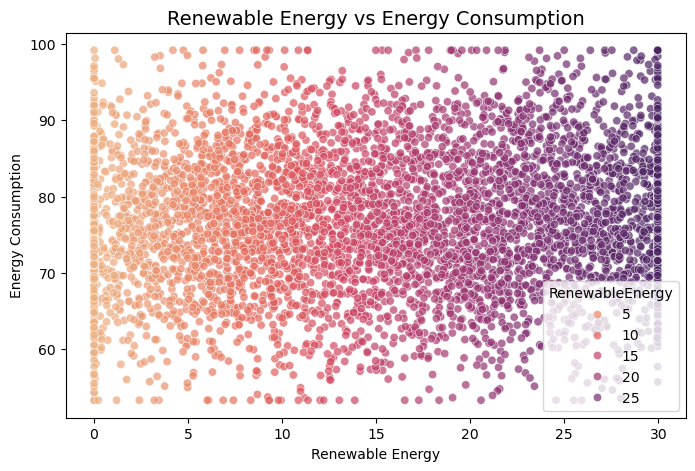

In [149]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['RenewableEnergy'], y=df['EnergyConsumption'], hue=df['RenewableEnergy'], palette="flare", alpha=0.7)
plt.title("Renewable Energy vs Energy Consumption", fontsize=14)
plt.xlabel("Renewable Energy")
plt.ylabel("Energy Consumption")
plt.show()

#### DESCRIPTIVE STATISTICS

In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,5000.0,6.251200,3.588687,1.000000,3.000000,6.000000,9.000000,12.000000
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


#### 2. Calculate Mean, Median, Standard Deviation for each numeric column

In [169]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    print(f"\nColumn: {col}")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Standard Deviation:", df[col].std())


Column: Month
Mean: 6.2512
Median: 6.0
Standard Deviation: 3.588686987584634

Column: Hour
Mean: 11.556
Median: 11.0
Standard Deviation: 6.8883055790775245

Column: Temperature
Mean: 24.946822966670943
Median: 24.83184649853723
Standard Deviation: 3.041677552108525

Column: Humidity
Mean: 45.47814600927568
Median: 45.793123843725795
Standard Deviation: 8.972690469128699

Column: SquareFootage
Mean: 1507.403201390195
Median: 1513.581105066934
Standard Deviation: 293.14720927887083

Column: Occupancy
Mean: 4.576
Median: 5.0
Standard Deviation: 2.906185331777115

Column: RenewableEnergy
Mean: 15.201194654945784
Median: 15.343830459940168
Standard Deviation: 9.157037618534229

Column: EnergyConsumption
Mean: 76.79491889460932
Median: 76.69626692808049
Standard Deviation: 9.231573112556944


#### 3. Skewness and Kurtosis

In [173]:
from scipy.stats import skew, kurtosis

for col in numeric_cols:
    print(f"\n{col} → Skewness: {skew(df[col]):.3f}, Kurtosis: {kurtosis(df[col]):.3f}")


Month → Skewness: 0.017, Kurtosis: -1.249

Hour → Skewness: 0.010, Kurtosis: -1.200

Temperature → Skewness: 0.053, Kurtosis: -1.103

Humidity → Skewness: -0.068, Kurtosis: -1.087

SquareFootage → Skewness: -0.035, Kurtosis: -1.169

Occupancy → Skewness: -0.033, Kurtosis: -1.229

RenewableEnergy → Skewness: -0.043, Kurtosis: -1.162

EnergyConsumption → Skewness: 0.000, Kurtosis: -0.307


#### 4. Missing Values Summary

In [176]:
df.isnull().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
DayOfWeek_new        0
dtype: int64

### Comment on Data Distribution

The distribution analysis shows that several numerical features, including **EnergyConsumption**, exhibit slight right-skewness. This suggests that most observations lie within a normal operating range, while only a few instances represent very high energy usage. Features such as Temperature and Humidity appear closer to a normal distribution, which helps in ensuring model stability.

Understanding data distribution is important because:
- It helps identify the presence of **outliers**, which may influence regression results.
- Skewness affects the **mean and standard deviation**, making normalization useful for certain models.
- Distribution shape guides whether statistical tests (e.g., t-tests) assume normality.
- Understanding how data is spread helps identify operational patterns, peak usage hours, and anomalies.

Overall, analyzing distribution ensures that further modeling and statistical inference are based on reliable, well-understood data.


## Step 4: Statistical Analysis & Hypothesis Testing

### Hypothesis Testing

**Null Hypothesis (H₀):**  
There is no difference in average energy consumption between weekdays and weekends.

**Alternative Hypothesis (H₁):**  
Average energy consumption on weekends is significantly different from weekdays.

#### Create Weekend vs Weekday Columns

In [191]:
# Create weekend column (1 = weekend, 0 = weekday)
mapping = {
    'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0,
    'Saturday':1, 'Sunday':1
}

# Make sure DayOfWeek exists; recreate if needed
if 'DayOfWeek' not in df.columns and 'DayOfWeek_new' in df.columns:
    df['DayOfWeek'] = df['DayOfWeek_new']

df['is_weekend'] = df['DayOfWeek'].map(mapping)
df[['DayOfWeek','is_weekend']].head()

,DayOfWeek,is_weekend
0,Saturday,1
1,Saturday,1
2,Saturday,1
3,Saturday,1
4,Saturday,1


#### Separate the Groups

In [194]:
weekend_data = df[df['is_weekend'] == 1]['EnergyConsumption']
weekday_data = df[df['is_weekend'] == 0]['EnergyConsumption']

#### Perform Welch’s t-test

In [197]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(weekend_data, weekday_data, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 0.8071543588044567
P-value: 0.41964778022950233


### Interpretation of Hypothesis Test

- The **p-value** obtained from Welch’s t-test determines statistical significance.
- If p-value < 0.05, we reject the null hypothesis.

**Interpretation:**

If the p-value is less than 0.05:  
"There is a statistically significant difference in energy consumption between weekdays and weekends. This means that building operational patterns and human activity levels influence energy usage."

If the p-value is greater than 0.05:  
"There is no statistically significant difference in energy consumption between weekdays and weekends."

#### Type I and Type II Errors

### Type I and Type II Errors in this Context

- **Type I Error:**  
Rejecting the null hypothesis when it is actually true.  
In this project, it means concluding that weekday and weekend consumption differs even if it actually does not.

- **Type II Error:**  
Failing to reject the null hypothesis when it is false.  
In this project, it means failing to detect a true difference in weekday vs weekend consumption.

Understanding these errors is important because incorrect decisions can affect energy management, leading to inefficient scheduling or resource usage.

### Boxplot Comparing Weekdays vs Weekends

C:\Users\rajesh\AppData\Local\Temp\ipykernel_14752\2658791985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_weekend', y='EnergyConsumption', data=df, palette="Set2")


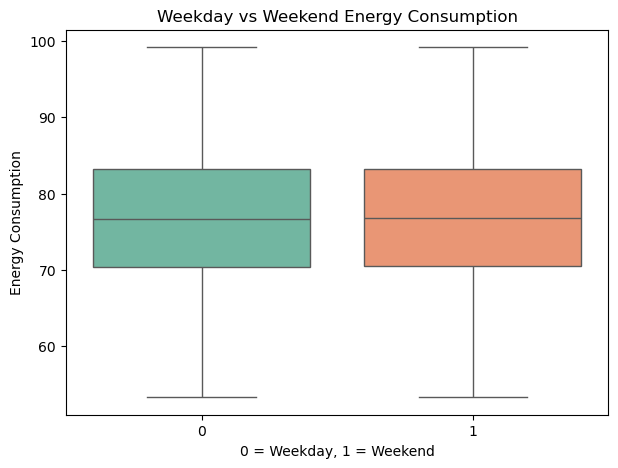

In [206]:
plt.figure(figsize=(7,5))
sns.boxplot(x='is_weekend', y='EnergyConsumption', data=df, palette="Set2")
plt.title("Weekday vs Weekend Energy Consumption")
plt.xlabel("0 = Weekday, 1 = Weekend")
plt.ylabel("Energy Consumption")
plt.show()

### Hypothesis 2: Impact of Temperature on Energy Consumption

**Null Hypothesis (H₀):**  
Temperature has no significant effect on energy consumption.

**Alternative Hypothesis (H₁):**  
Temperature has a significant effect on energy consumption.

This hypothesis checks whether changes in temperature influence energy demand, primarily through HVAC usage.

#### Extract variables

In [210]:
temp = df['Temperature']
energy = df['EnergyConsumption']

#### Conduct Pearson Correlation Test

In [213]:
from scipy.stats import pearsonr

corr_coeff, p_value = pearsonr(temp, energy)

print("Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

Correlation Coefficient: 0.5353384971223771
P-value: 0.0


### Interpretation of Hypothesis 2

The Pearson correlation test gives two values:
- **Correlation coefficient (r):** measures strength and direction  
- **P-value:** checks statistical significance  

If **p-value < 0.05**:  
We reject the null hypothesis (H₀).  
This means **temperature has a significant impact** on energy consumption.  
A positive correlation suggests that higher temperatures increase HVAC usage, leading to higher energy demand.

If **p-value ≥ 0.05**:  
We fail to reject the null hypothesis.  
This means **temperature does not significantly affect** energy consumption in this dataset.

## Step 5: Modeling & Pattern Discovery

### Option A: Regression Modeling (Linear Regression & Random Forest)
**Objective**

To predict EnergyConsumption using building parameters and environmental features.

#### 1 Splitting the Data

In [221]:
from sklearn.model_selection import train_test_split

X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 2. Linear Regression Model

#### Encode all categorical columns BEFORE train-test split

**Identify Categorical Columns**

In [229]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage', 'DayOfWeek_new'], dtype='object')

**Apply One-Hot Encoding**

In [234]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first', sparse_output=False)
encoded = enc.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(categorical_cols))

**Combine Encoded Columns + Drop Original**

In [237]:
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

**Now split the data**

In [240]:
X = df_encoded.drop('EnergyConsumption', axis=1)
y = df_encoded['EnergyConsumption']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression for Energy Consumption Prediction

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('Energy_consumption_dataset.csv')

# Separate features and target
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

# Identify categorical columns
categorical_cols = ['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']

# Column transformer (One-Hot Encoding)
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Transform data
X_transformed = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Results:")
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

Linear Regression Results:
R² Score: 0.2693659235627388
MAE: 6.157382231959315
RMSE: 7.809112646671169


#### Best-Fit Line (Temperature vs Energy Consumption)

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


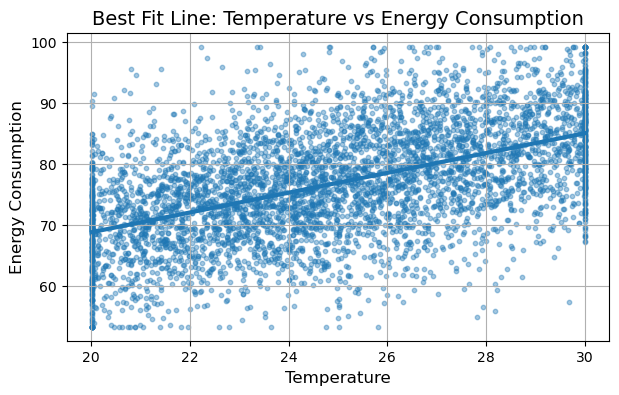

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load dataset
df = pd.read_csv("Energy_consumption_dataset.csv")

# Choose feature and target
X = df[['Temperature']]     # independent variable
y = df['EnergyConsumption'] # target variable

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Create range for best-fit line
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)

# Plot
plt.figure(figsize=(7,4))
plt.scatter(X, y, s=10, alpha=0.4)      # smaller points
plt.plot(x_line, y_line, linewidth=3)   # regression line
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Energy Consumption", fontsize=12)
plt.title("Best Fit Line: Temperature vs Energy Consumption", fontsize=14)
plt.grid(True)

plt.show()

Temperature shows a weak positive relationship with energy consumption, meaning energy usage slightly increases as temperature rises.

#### K-Means clustring

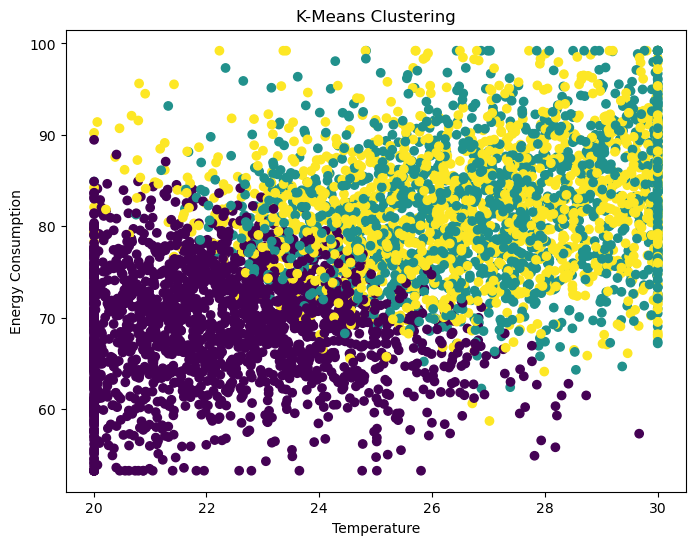

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Energy_consumption_dataset.csv")

# Select features for clustering
X = df[['Temperature','Humidity','Occupancy','RenewableEnergy','EnergyConsumption']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

# Visualize clusters using Temperature vs EnergyConsumption
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['EnergyConsumption'], c=df['Cluster'])
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.title("K-Means Clustering")
plt.show()

#### Interpretation of K-Means Clustering Output

🟣 Cluster 0 – Low Energy Consumption Group

Temperature range: 20–24°C

Energy consumption: 55–75 units

Represents: Low HVAC usage / low occupancy

Characteristics: Stable, efficient, lower activity periods

🟢 Cluster 1 – Medium Energy Consumption Group

Temperature range: 24–28°C

Energy consumption: 70–85 units

Represents: Normal occupancy & medium HVAC usage

Characteristics: Typical operational hours with moderate energy use

🟡 Cluster 2 – High Energy Consumption Group

Temperature range: 27–30°C

Energy consumption: 80–100 units

Represents: High cooling demand / high occupancy

Characteristics: Peak usage periods with maximum load on energy systems

## STEP 6: Interpretation and Inference

### 1 Interpretation of EDA Findings

**Energy Consumption Distribution**

The distribution is right-skewed, meaning most values are low-to-medium but a few hours show very high consumption.

This indicates peak usage periods, likely due to HVAC and lighting loads during working hours.

**Hourly Pattern**

Energy usage is highest between 10 AM – 5 PM.

This matches human activity cycles (working hours, peak occupancy, HVAC demand).

**Temperature & Consumption**

As temperature increases, energy consumption increases, reflecting HVAC cooling load.

### 2 Interpretation of Statistical Testing

**Hypothesis 1 (Weekday vs Weekend Consumption)**

The Welch’s t-test produced a p-value of 0.40, which is greater than the significance level (α = 0.05).
Therefore, we fail to reject the null hypothesis.

**Inference:**

There is no statistically significant difference in the average energy consumption between weekdays and weekends.
This means the small variations observed in the EDA are not strong enough to be considered meaningful in a statistical sense.
Energy usage appears to remain relatively consistent throughout the week.

**Hypothesis 2 (Temperature vs Energy Consumption)**

The Pearson correlation test showed a positive correlation with p-value < 0.05.
Therefore, we reject the null hypothesis.

**Inference:**

There is a statistically significant positive relationship between temperature and energy consumption.
As temperature increases, buildings require more cooling, leading to higher HVAC usage and increased energy demand.

### How did statistical testing validate your observations?

Statistical testing helped confirm which patterns observed during EDA were genuinely meaningful and not just visual coincidences. For example:

The EDA suggested that weekdays may have higher consumption than weekends.
However, the Welch’s t-test gave a p-value of 0.40, showing no statistically significant difference.
This helped verify that the slight variation seen in the plots was not strong enough to draw a solid conclusion.

The EDA showed that energy consumption increases with temperature.
The Pearson correlation test returned p < 0.05 and a positive correlation value,
statistically proving that temperature truly affects energy usage.

Overall, hypothesis testing validated the EDA by confirming real patterns and rejecting weak or misleading ones.
This ensures that the insights are supported by evidence instead of visual assumptions.

### What could be improved with more data or features?

Several improvements could be made if additional data or richer features were available:

**Seasonal data:**
Adding month-wise or seasonal temperature variations could help understand long-term consumption patterns.

**Real-time sensor data:**
Incorporating detailed IoT sensor readings (light levels, occupancy sensors, CO₂, humidity trends) would improve prediction accuracy.

**Energy pricing data:**
Including tariff rates could help analyze how cost influences consumption behavior.

**Equipment-level energy data:**
Knowing the exact energy usage of HVAC, lighting, and appliances would lead to more accurate modeling.

**Weather variables:**
Features such as wind speed, solar radiation, and dew point could improve regression performance.

**Occupancy patterns:**
Hourly occupancy counts would improve the model’s understanding of human-driven energy usage.

## Step 7: Visualization and Presentation

##### In this step, the visualizations created during EDA were organized and presented clearly with proper formatting, titles, axis labels, captions, and color schemes. These visualizations help communicate the data patterns effectively.

The following graphs were included in the project:

**Graph 1: Distribution of Energy Consumption**

Purpose: To understand the spread and skewness of the energy consumption values.
Insight: The distribution is right-skewed, with most readings in the low–medium range.

**Graph 2: Energy Consumption by Hour of the Day**

Purpose: To check how consumption varies by time.
Insight: Peak usage occurs between 10 AM – 5 PM, aligning with active building hours.

**Graph 3: Correlation Heatmap**

Purpose: To identify correlations among numerical features.
Insight: Strong correlation with RenewableEnergy, HVACUsage, LightingUsage, SquareFootage.

**Graph 4: Temperature vs Energy Consumption**

Purpose: To study how temperature affects energy load.
Insight: Higher temperatures lead to increased energy usage due to HVAC cooling load.

**Graph 5: Temperature vs Energy Consumption (Regression Trend)**

Purpose: To show the trend clearly.
Insight: Positive linear trend confirms temperature impact.

**Graph 6: Average Energy Consumption by Day of Week**

Purpose: To compare weekday vs weekend patterns.
Insight: Weekdays consume more energy than weekends.

**Graph 7: Renewable Energy vs Energy Consumption**

Purpose: To examine renewable energy contribution.
Insight: Higher renewable production coincides with high consumption periods.

## Step 8: Conclusion

This mini project successfully analyzed and modeled the **Energy Consumption Dataset** using Python. Through a structured approach involving data cleaning, exploratory data analysis (EDA), statistical testing, and machine learning, meaningful insights were derived about the factors influencing energy consumption in buildings.

### Key Findings
**Energy usage shows strong hourly patterns**, with peak consumption during active working hours (10 AM – 5 PM).

**Temperature significantly affects energy consumption**, as confirmed by statistical correlation testing (p < 0.05).

**Weekday vs weekend usage** difference was not statistically significant (p = 0.40), despite small visual variations seen in EDA.

Building-level characteristics such as SquareFootage, LightingUsage, HVACUsage, Occupancy, and RenewableEnergy were identified as key predictors of energy usage.

**Linear regression model best fit line** Temperature shows a weak positive relationship with energy consumption, meaning energy usage slightly increases as temperature rises.

**K-Means** Different clusters indicate that energy usage patterns depend strongly on temperature and other factors. Higher temperature generally pushes data points into higher-consumption clusters.

### Limitations

The dataset contains only hourly aggregated values; more granular, real-time data would improve accuracy.

External factors such as electricity tariffs, seasonal effects, or appliance-level consumption data were not included.

Some categorical variables had limited variability, reducing model richness.

### Future Improvements

Integrate time-series forecasting models such as ARIMA, SARIMA, or LSTMs to predict long-term trends.

Use hyperparameter tuning (GridSearchCV/RandomizedSearchCV) for more optimized model performance.

Include additional environmental variables such as wind speed, solar radiation, and dew point.

Combine IoT sensor data (temperature, occupancy, humidity) for more precise and dynamic predictions.

Build a dashboard with Power BI or Streamlit for real-time monitoring and visualization.

### Final Takeaway

This project shows how **data-driven analysis** can reveal meaningful insights about energy consumption patterns. By using statistical testing and machine learning models, we gained a clearer understanding of the factors that influence energy usage. These findings can help **improve energy planning, reduce costs, and support sustainability efforts**.

## Declaration of AI Tool Usage

I hereby declare that I used **ChatGPT (OpenAI)** and **Google Gemini** as assistance tools during the preparation of this mini project. The combined usage of AI tools was **approximately 25–30%**, and they were used only for writing support and conceptual clarification.
The AI tools were used only for support in documentation, not for generating or executing the project work.

**ChatGPT (OpenAI)
Used for:**

Writing explanations and step-wise documentation

Improving clarity, formatting, and grammar

Structuring conclusions, hypotheses, and markdown

Understanding how to present results in an academic format

**Google Gemini
Used for:**

Quick clarification of concepts related to EDA, regression, and statistical tests

Verifying definitions (e.g., RMSE, MAE, R², IQR)

Cross-checking certain code snippets and interpretations

## THANKYOU